# Name : Fernando I.A.M.D.
# Index No.: 190172K

In [1]:
import cv2
import numpy as np
import sympy
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline 

## Q1

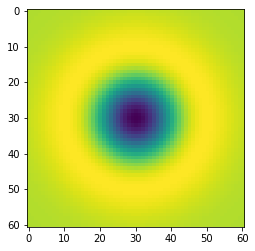

In [5]:
sigma = 10
hw = 3*sigma

X,Y = np.meshgrid(np.arange(-hw,hw+1,1),np.arange(-hw,hw+1,1))

log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) + Y**2/(sigma**2) - 2)*np.exp(-(X**2 + Y**2)/(2*sigma**2))
plt.imshow(log)

plt.show()

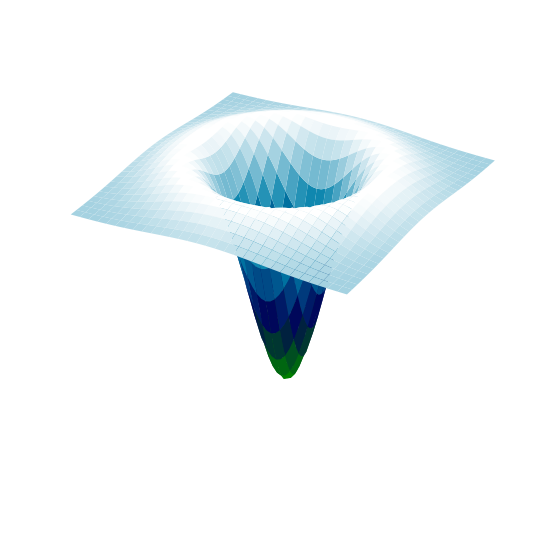

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection = '3d')

surf = ax.plot_surface(X,Y,log,cmap=cm.ocean,linewidth=0,antialiased = True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.axis('off')
plt.show()

## Q2

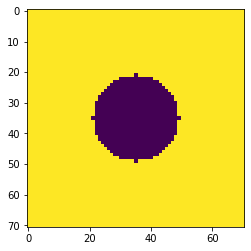

In [7]:
w,h = 71,71
hw = w//2
hh = h//2

f = np.ones((h,w),dtype=np.float32)*255

X,Y = np.meshgrid(np.arange(-hh,hh+1,1),np.arange(-hw,hw+1,1))

r = w//5
f *= X**2 + Y**2 > r**2

plt.imshow(f)

plt.show()


(35, 35, 5)


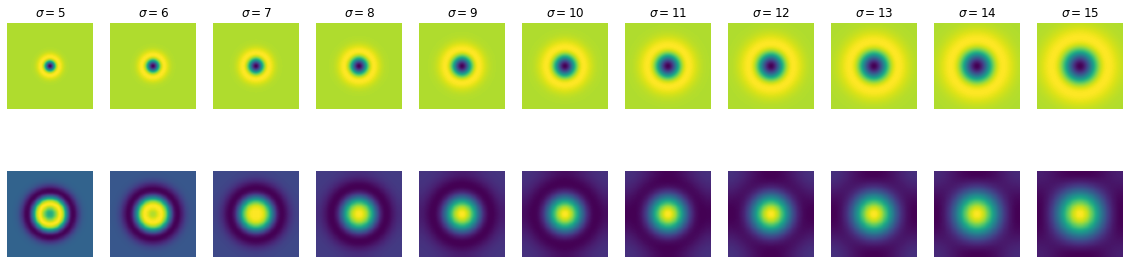

In [18]:
s = 11
fig,ax = plt.subplots(2,s,figsize =(20,5))
scale_space = np.empty((h,w,s),dtype = np.float32)
sigmas = np.arange(5,16,1)
for i,sigma in enumerate(sigmas):
    log_hw = 3*np.max(sigmas)
    X,Y = np.meshgrid(np.arange(-log_hw,log_hw+1,1),np.arange(-log_hw,log_hw+1,1))
    log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) + Y**2/(sigma**2) - 2)*np.exp(-(X**2 + Y**2)/(2*sigma**2))
    f_log = cv2.filter2D(f,-1,log)
    scale_space[:,:,i] = f_log
    ax[0,i].imshow(log)
    ax[0,i].axis('off')
    ax[0,i].set_title(r'$\sigma = {}$'.format(sigma))
    ax[1,i].imshow(f_log)
    ax[1,i].axis('off')

indices = np.unravel_index(np.argmax(scale_space,axis=None),scale_space.shape)
print(indices)

## Q3

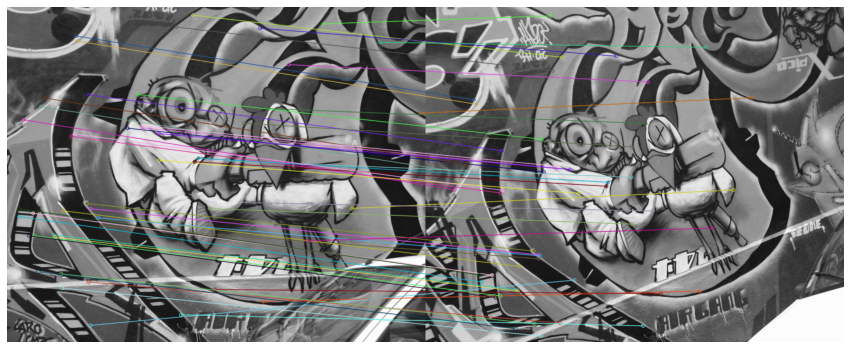

In [6]:
img1 = cv2.imread('img1.ppm')  
img2 = cv2.imread('img2.ppm') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

bf_match = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf_match.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

match_img = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(match_img)
plt.show()

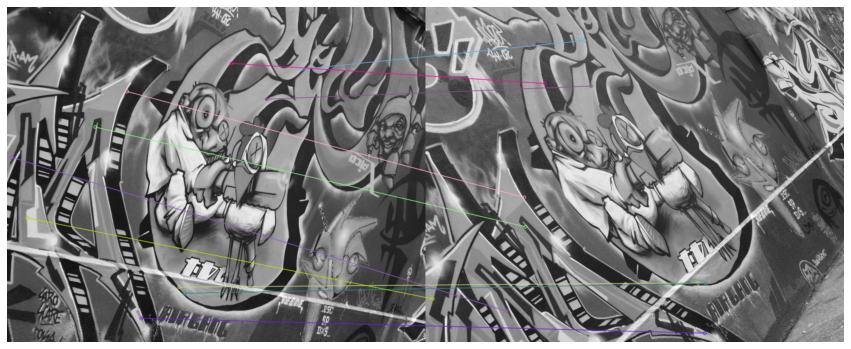

In [3]:
img1 = cv2.imread('img3.ppm')  
img2 = cv2.imread('img4.ppm') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

bf_match = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf_match.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

match_img = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:10], img2, flags=2)
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(match_img)
plt.show()

## Q4

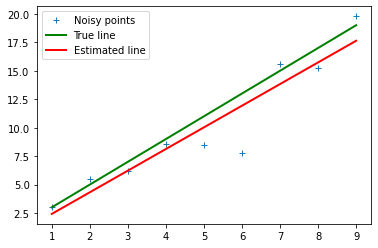

In [7]:
m = 2
c = 1
x = np.arange (1 ,10 , 1)
np.random.seed(45)
n = 2.*np. random.randn(len(x))
o = np . zeros (x.shape)
# o[-1] = 20
y = m*x + c + n + o

n= len(x)
X = np.concatenate([x.reshape(n,1), np.ones((n,1))], axis=1)
B = np.linalg.pinv(X.T @ X) @ X.T @ y
mstar = B[0]
cstar = B[1]

plt.plot(x, y, '+', label = 'Noisy points')
plt.plot([x[0], x[-1]], [m*x[0] + c, m*x[-1]+c ], color='g', linewidth=2, label=r'True line')
plt.plot([x[0], x[-1]], [mstar*x[0] + cstar, mstar*x[-1]+cstar ], color='r', linewidth=2, label=r'Estimated line')
plt.legend()
plt.show()

## Q5

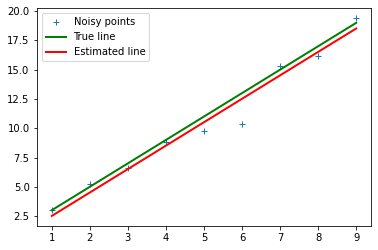

In [8]:
m = 2
c = 1
x = np.arange(1,10,1)
np.random.seed(45)

noise = np.random.randn(len(x))
o = np.zeros(x.shape)
y = m*x +c + noise + o

n = len(x)

u11 = np.sum((x - np.mean(x))**2)
u12 = np.sum((x - np.mean(x))*(y- np.mean(y)))
u21=u12
u22 = np.sum((y-np.mean(y))**2)

U = np.array([[u11,u12],[u21,u22]])
W,V = np.linalg.eig(U)

ev_corresponding_to_smallest_ev = V[:,np.argmin(W)]

a = ev_corresponding_to_smallest_ev[0]
b = ev_corresponding_to_smallest_ev[1]
d = a*np.mean(x) + b*np.mean(y)

mstar = -a/b
cstar = d/b

plt.plot(x, y, '+', label = 'Noisy points')
plt.plot([x[0], x[-1]], [m*x[0] + c, m*x[-1]+c ], color='g', linewidth=2, label=r'True line')
plt.plot([x[0], x[-1]], [mstar*x[0] + cstar, mstar*x[-1]+cstar ], color='r', linewidth=2, label=r'Estimated line')
plt.legend()
plt.show()
